# Лабораторная работа №6. Библиотека MatPlotLib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Импорт датасета

Импортируйте полученный в результате выполнения 5-ой лабораторной датасет

In [ ]:
df = pd.read_csv("cars_moldova_processed.csv")

## Гистограммы распределений

1. Постройте гистограмму (распределения) значений по признаку `Engine_capacity(cm3)`


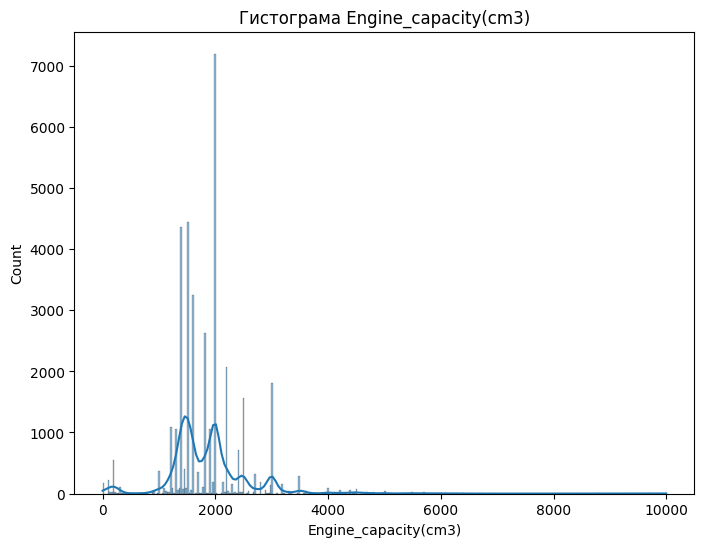

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df["Engine_capacity(cm3)"], kde=True)
plt.title("Гистограма Engine_capacity(cm3)")
plt.show()

2. Постройте гистограммы (распределения) значений по каждому числовому признаку (столбцу)

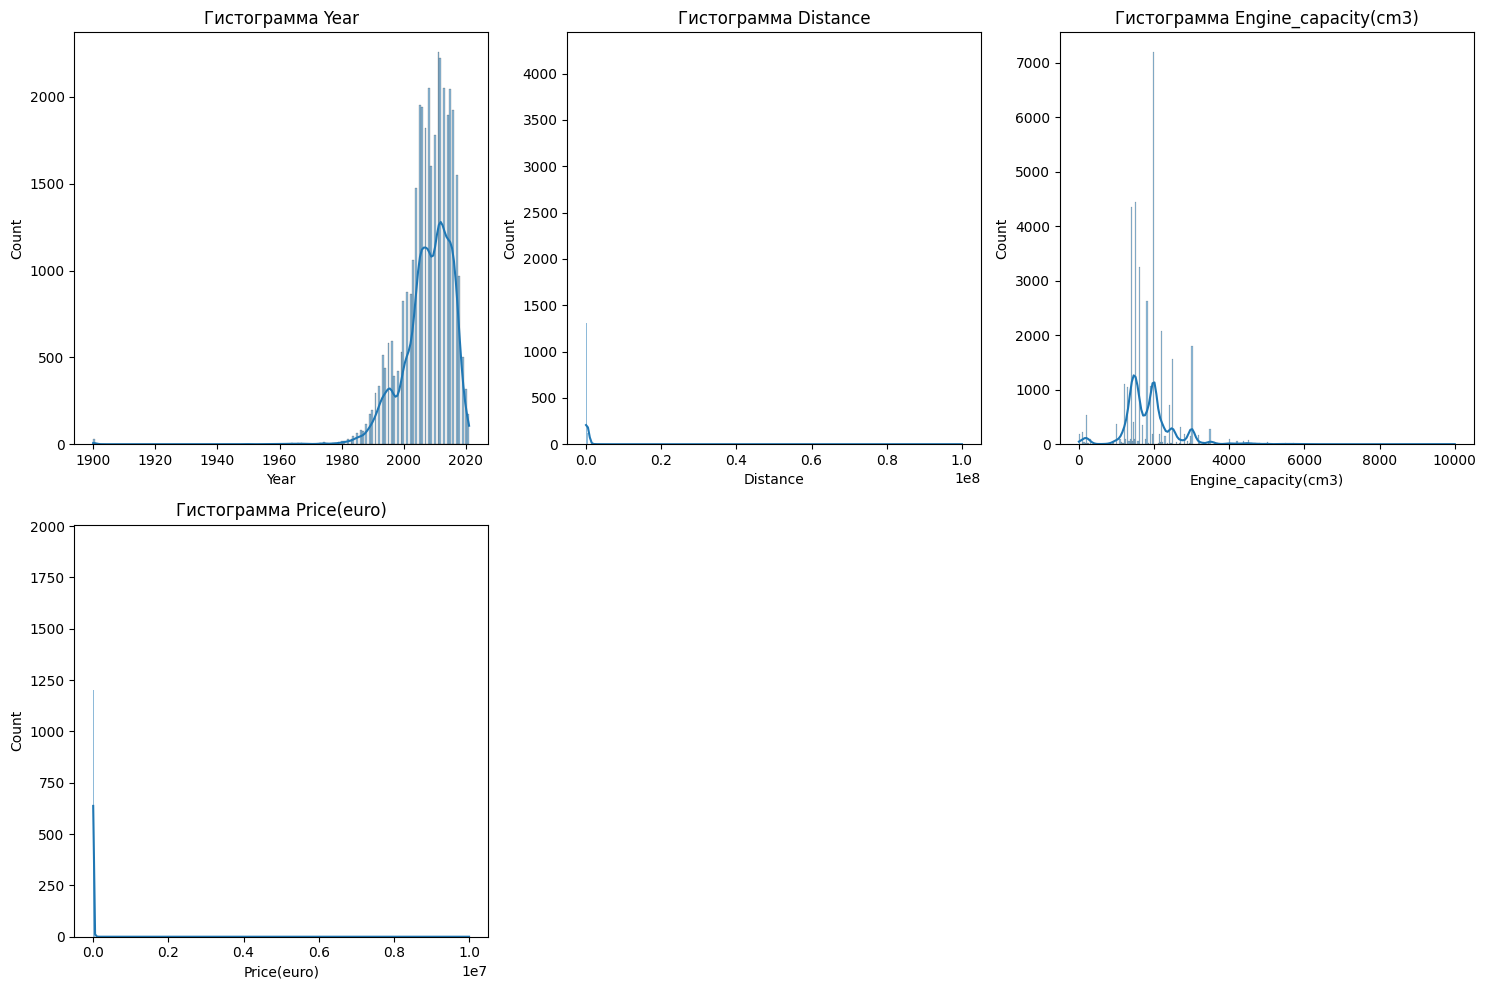

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate (num_cols):
  plt.subplot(2, 3, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f"Гистограмма {col}")
plt.tight_layout()
plt.show()

Столбцы `Distance` и `Price(euro)` имеют явные "выбросы", нужно посмотреть на них поближе.

3. Постройте гистограммы признаков `Distance` и `Price(euro)` в логарифмическом масштабе

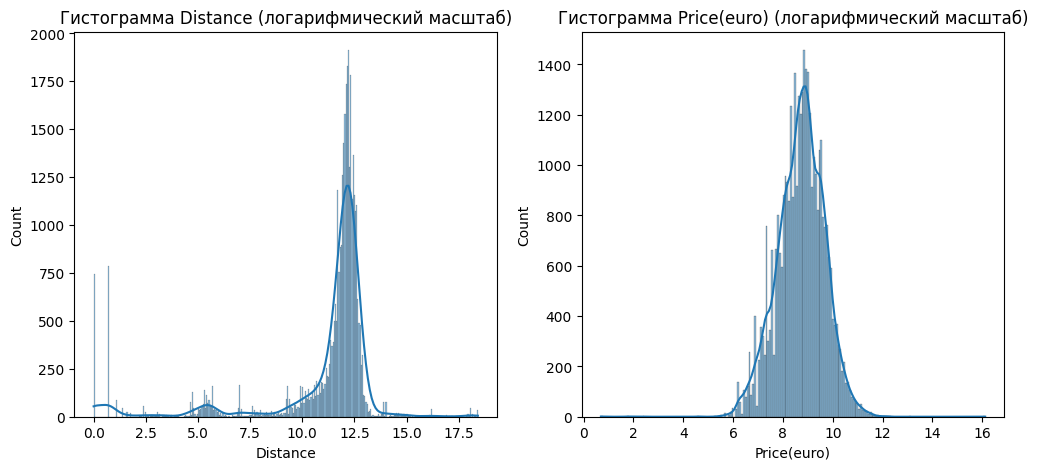

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df['Distance']), kde=True) #log1p обрабатывает нули
plt.title('Гистограмма Distance (логарифмический масштаб)')
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Price(euro)']), kde=True)
plt.title('Гистограмма Price(euro) (логарифмический масштаб)')
plt.show()

Теперь мы можем определить, что нам требуется, чтобы почистить столбцы.

4. Удалите записи из датафрейма, у которых:

    1) Пробег (Distance) меньше 1100 и год (Year) меньше 2021 (одновременно)
    2) Пробег (Distance) больше 500000
    3) Год (Year) меньше 1971
    4) Объём двигателя (Engine_capacity(cm3)) меньше 200 (только для дизельных машин!), а также больше 5000
    5) Цена (Price(euro)) меньше 101, а также больше 50000

In [ ]:
df = df[~((df['Distance'] < 1100) & (df['Year'] < 2021))]
df = df[df['Distance'] <= 500000]
df = df[df['Year'] >= 1971]
df = df[~((df['Fuel_type'] == 'Diesel') & ((df['Engine_capacity(cm3)'] < 200)))]
df = df[df["Engine_capacity(cm3)"] < 5000]
df = df[(df['Price(euro)'] >= 101) & (df['Price(euro)'] <= 50000)]
df = df.reset_index(drop=True)

5. Постройте гистограммы (распределения) значений по каждому числовому признаку после манипуляций с данными


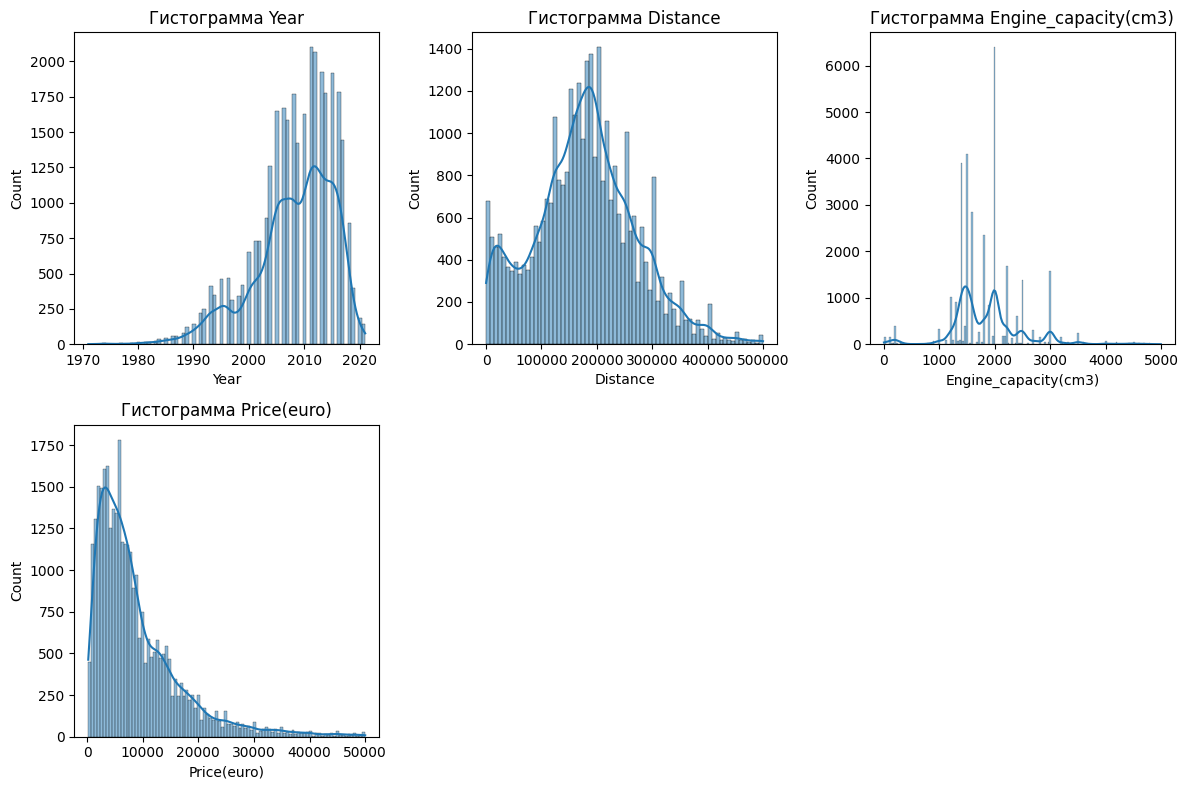

In [29]:
num_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate (num_cols):
  plt.subplot(2, 3, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f"Гистограмма {col}")
plt.tight_layout()
plt.show()

## Зависимости параметров друг от друга

6. Постройте графики зависимости параметров друг от друга

    Используйте метод seaborn `.pairplot(data, hue, palette)`

    Для подкраски данных используйте признак `Transmission`     

<Figure size 800x600 with 0 Axes>

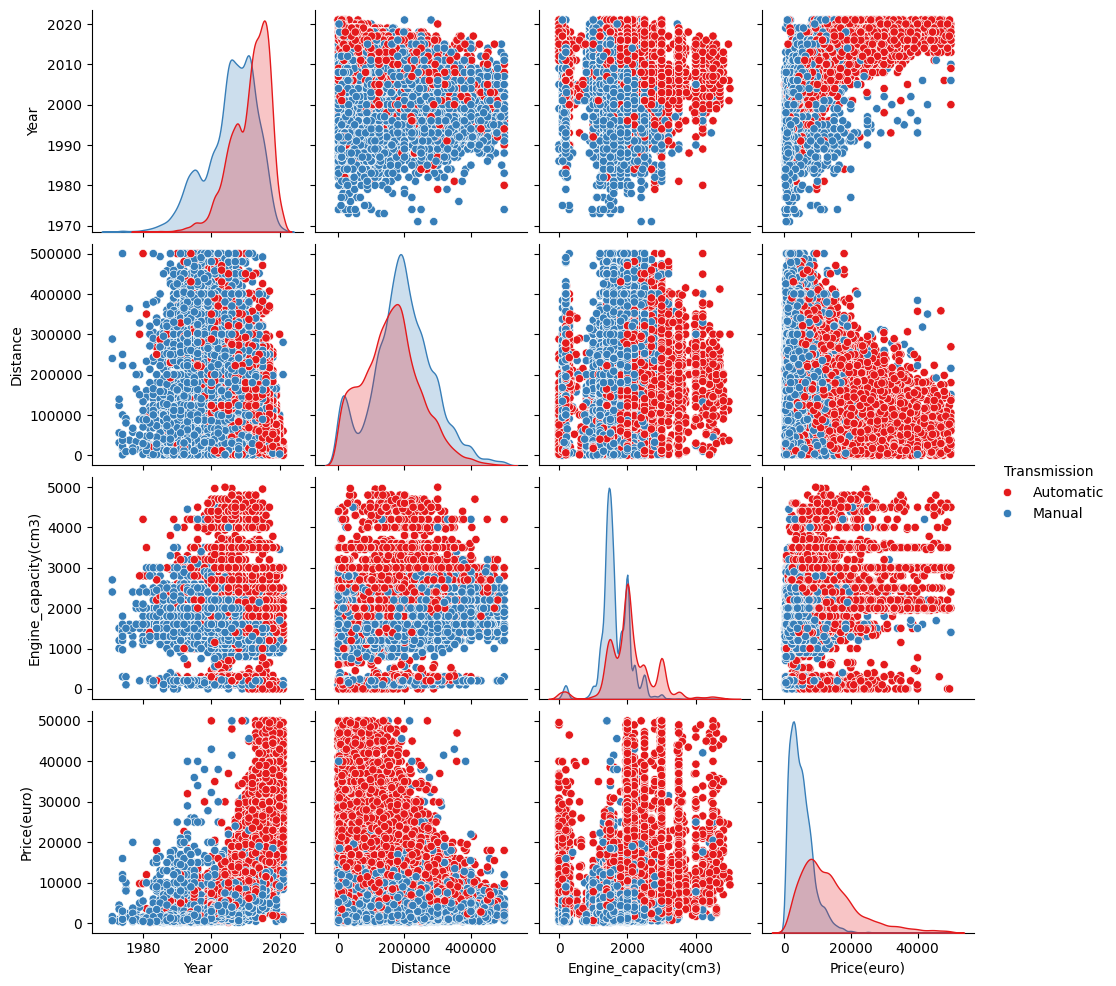

In [30]:
plt.figure(figsize=(8, 6))
sns.pairplot(df, hue='Transmission', palette='Set1') #palette - цветовая палитра
plt.show()

## Скатерограмма данных

7. Постройте скатерограмму для признаков `Price(euro)` и `Year`, выделив цветом тип трансмиссии (`Transmission`)

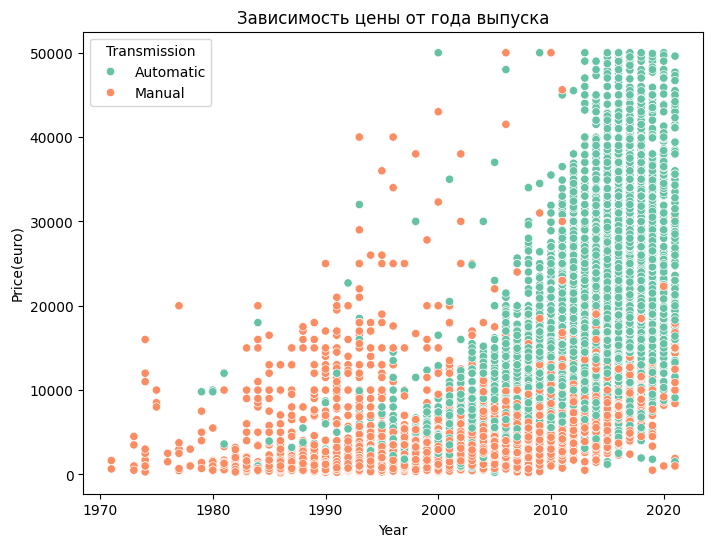

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year', y='Price(euro)', hue='Transmission', data=df, palette='Set2')
plt.title('Зависимость цены от года выпуска')
plt.show()

## Violinplot

8. Постройте скрипичную диаграмму для оценки распределения цены (`Price(euro)`) для разных значений типа топлива (`Fuel_type`), выделив цветом тип трансмиссии (`Transmission`)

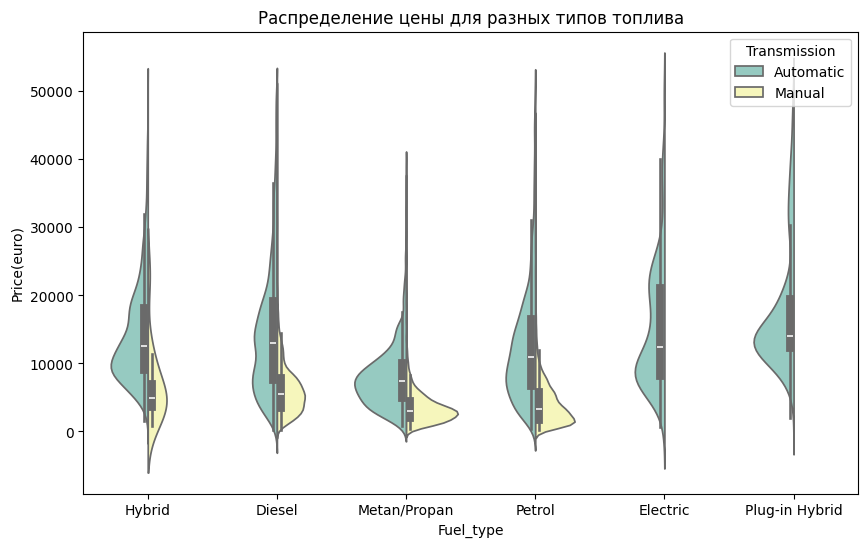

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Fuel_type', y='Price(euro)', hue='Transmission', data=df, palette='Set3', split=True) #split - разделение скрипок
plt.title('Распределение цены для разных типов топлива')
plt.show()

## Boxplot

9. Постройте Boxplot для данных из предыдущего задания

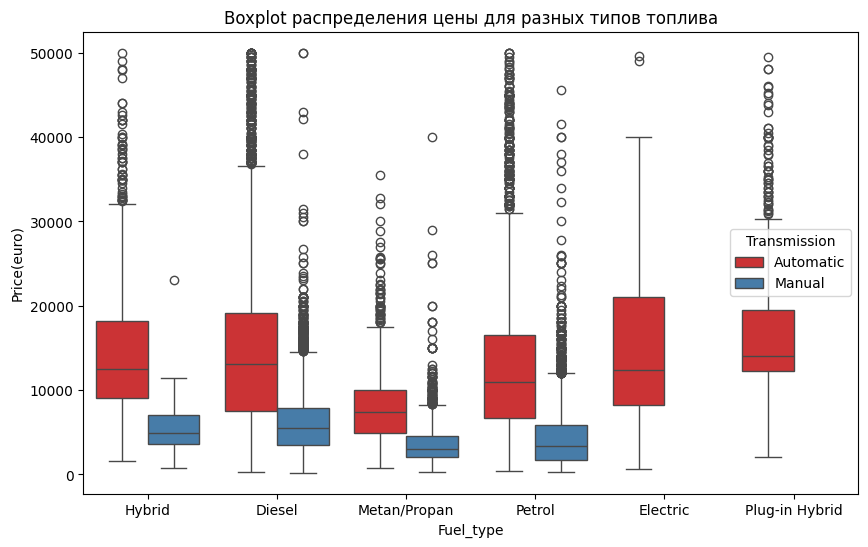

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_type', y='Price(euro)', hue='Transmission', data=df, palette='Set1')
plt.title('Boxplot распределения цены для разных типов топлива')
plt.show()